In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
Df = pd.read_csv("TipsDataSet.txt")

In [3]:
Df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


## Challenge Questions


    Delete the Unnamed 0 column
    Plot the total_bill column histogram
    Create a scatter plot presenting the relationship between total_bill and tip
    Create one image with the relationship of total_bill, tip and size.
    Present the relationship between days and total_bill value
    Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex
    Create a box plot presenting the total_bill per day differentiation the time (Dinner or Lunch)
    Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.
    Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip     
    relationship, differing by smoker or no smoker


In [4]:
Df = Df.drop('Unnamed: 0', axis=1)

In [5]:
Df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


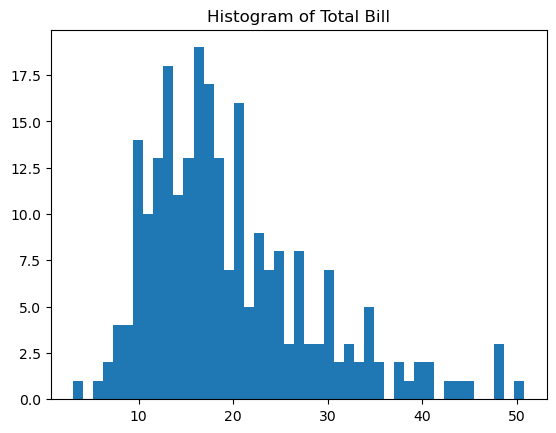

In [6]:
plt.hist(Df['total_bill'], bins=45)
plt.title('Histogram of Total Bill')
plt.show()

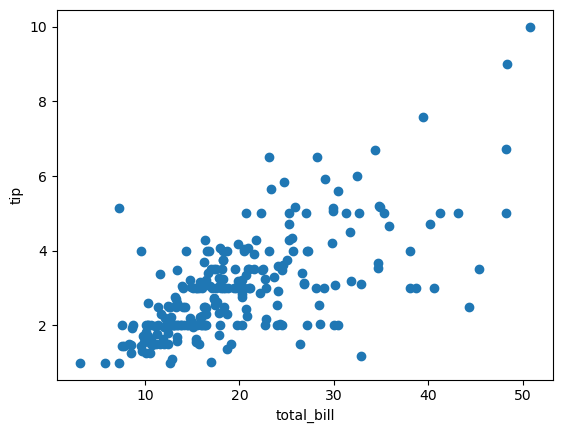

In [7]:
plt.scatter(Df['total_bill'],Df['tip'])
plt.xlabel("total_bill")
plt.ylabel("tip")

plt.show()

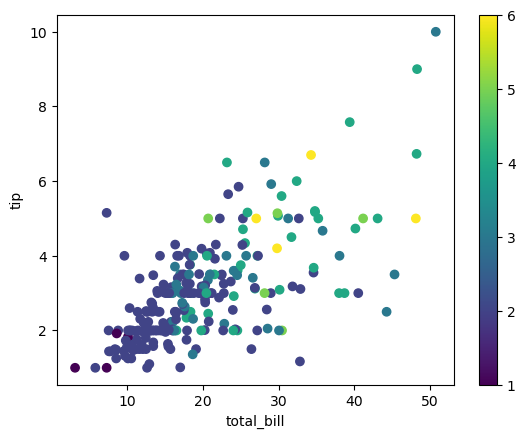

In [8]:
plt.scatter(Df['total_bill'],Df['tip'], c=Df['size'])
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.colorbar()
plt.show()

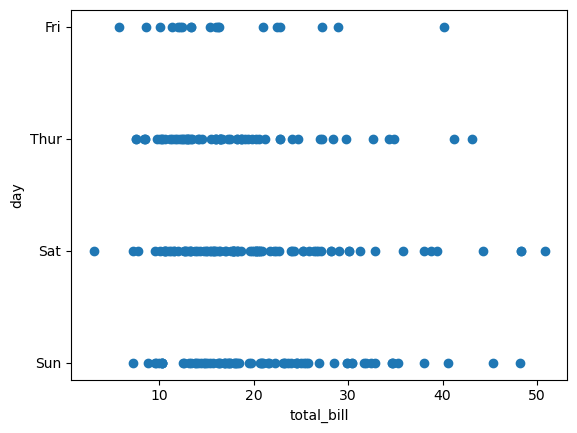

In [9]:
plt.scatter(Df['total_bill'],Df['day'])
plt.xlabel("total_bill")
plt.ylabel("day")

plt.show()

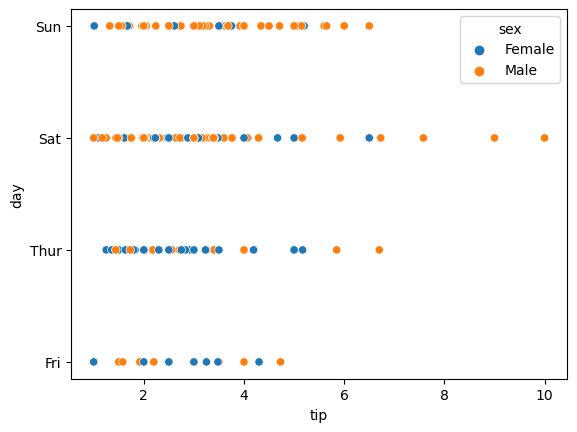

In [10]:
sns.scatterplot(x=Df['tip'],y=Df['day'],hue=Df['sex'])
plt.xlabel("tip")
plt.ylabel("day")
plt.show()

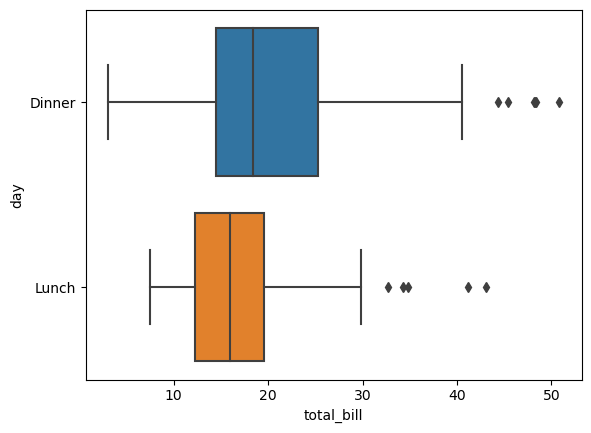

In [11]:
sns.boxplot(x=Df['total_bill'],y=Df['time'])
plt.xlabel("total_bill")
plt.ylabel("day")
plt.show()

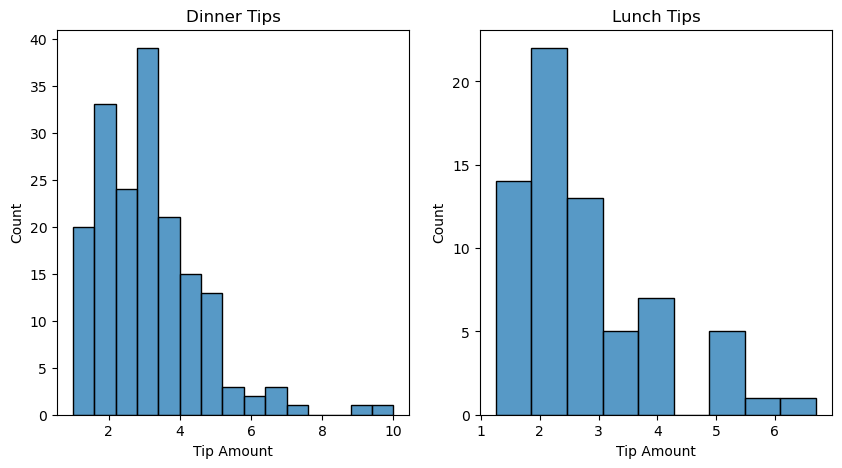

In [12]:
# Split the data into Dinner and Lunch tips
dinner_tips = Df[Df['time'] == 'Dinner']
lunch_tips = Df[Df['time'] == 'Lunch']

#Set up the figure with two subplots By "subplot"
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))




sns.histplot(x="tip", data=dinner_tips, ax=axes[0])
axes[0].set(title="Dinner Tips", xlabel="Tip Amount", ylabel="Count")


sns.histplot(x="tip", data=lunch_tips, ax=axes[1])
axes[1].set(title="Lunch Tips", xlabel="Tip Amount", ylabel="Count")

plt.show()

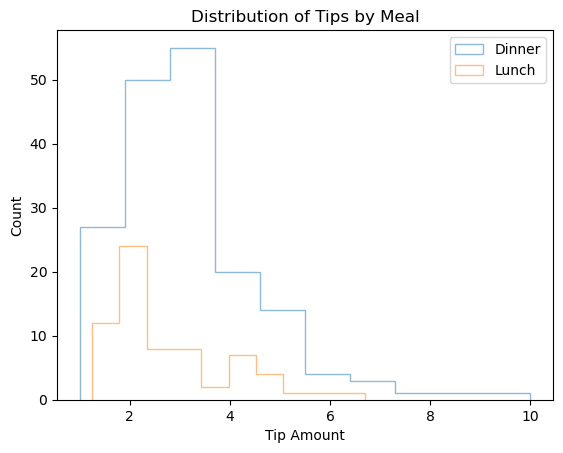

In [13]:
# Split the data into Dinner and Lunch tips
dinner_tips = Df[Df['time'] == 'Dinner']
lunch_tips = Df[Df['time'] == 'Lunch']

# Create two histograms with different styles
plt.hist(dinner_tips['tip'] ,alpha=0.5, label='Dinner', histtype='step')
plt.hist(lunch_tips['tip'] ,alpha=0.5, label='Lunch', histtype='step')
plt.legend()



plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.title('Distribution of Tips by Meal')
plt.show()

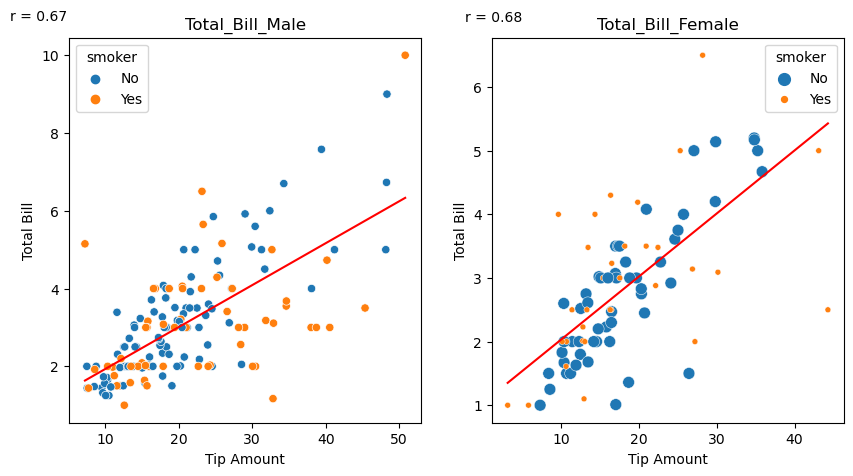

In [93]:
#Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, 
#differing by smoker or no smoker 

Male_Bill = Df[Df['sex'] == 'Male']
Female_Bill = Df[Df['sex'] == 'Female']

#Set up the figure with two subplots By "subplot"
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))



sns.scatterplot(x='total_bill',y='tip', data=Male_Bill,hue='smoker',ax=axes[0])
r = np.corrcoef(Male_Bill['total_bill'], Male_Bill["tip"])[0, 1]
axes[0].plot(np.unique(Male_Bill['total_bill']), np.poly1d(np.polyfit(Male_Bill['total_bill'], Male_Bill["tip"], 1))(np.unique(Male_Bill['total_bill'])), color='red')
axes[0].text(0.95, 11, f'r = {r:.2f}', ha='center', va='center')
axes[0].set(title="Total_Bill_Male", xlabel="Tip Amount", ylabel="Total Bill")




sns.scatterplot(x='total_bill',y='tip', data=Female_Bill, hue='smoker',size="smoker", ax=axes[1])
r = np.corrcoef(Female_Bill['total_bill'], Female_Bill["tip"])[0, 1]
axes[1].plot(np.unique(Female_Bill['total_bill']), np.poly1d(np.polyfit(Female_Bill['total_bill'], Female_Bill["tip"], 1))(np.unique(Female_Bill['total_bill'])), color='red')
axes[1].text(5, 7.2, f'r = {r:.2f}', ha='right', va='top')
axes[1].set(title="Total_Bill_Female", xlabel="Tip Amount", ylabel="Total Bill")

plt.show()




